In [3]:
import pandas as pd
import numpy as np

################ include this code when importing your libraries 

pd.set_option('display.max_columns', None) ## show all the columns in dataset
pd.set_option('display.max_rows', None) ## show all rows in dataset

################

df = pd.read_excel("IBM Employee Attrition.xlsx")

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


# Data Preparation and Cleaning

In [4]:
df.shape

(1470, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [6]:
df["Attrition"].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
df["EmpAttrition"] = 0
df.loc[df["Attrition"] == "Yes", "EmpAttrition"] = 1
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpAttrition
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0


In [ ]:
#removing outliers

In [8]:
dfc = df.copy()
dfc.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpAttrition
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0


In [9]:
dfc.shape

(1470, 31)

In [ ]:
#removing outliers for age

In [10]:
import scipy.stats as stats

In [11]:
dfc["z_age"] = np.abs(stats.zscore(dfc["Age"]))
dfc.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpAttrition,z_age
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,1,0.446350
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0,1.322365
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,1,0.008343
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0,0.429664
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0,1.086676


In [12]:
z_age_outliers = dfc.loc[dfc["z_age"] > 3].index

print(z_age_outliers)

# no outliers for age

Int64Index([], dtype='int64')


In [ ]:
#removing outliers for DistanceFromHome

In [13]:
dfc["z_DistanceFromHome"] = np.abs(stats.zscore(dfc["DistanceFromHome"]))

dfc.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpAttrition,z_age,z_DistanceFromHome
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,1,0.446350,1.010909
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0,1.322365,0.147150
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,1,0.008343,0.887515
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0,0.429664,0.764121
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0,1.086676,0.887515


In [14]:
z_DFH_outliers = dfc.loc[dfc["z_DistanceFromHome"] > 3].index

print(z_DFH_outliers)

Int64Index([], dtype='int64')


In [ ]:
# no outliers for DistanceFromHome

In [ ]:
#removing outliers for MonthlyIncome

In [15]:
dfc["z_MonthlyIncome"] = np.abs(stats.zscore(dfc["MonthlyIncome"]))
dfc.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpAttrition,z_age,z_DistanceFromHome,z_MonthlyIncome
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,1,0.446350,1.010909,0.108350
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0,1.322365,0.147150,0.291719
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,1,0.008343,0.887515,0.937654
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0,0.429664,0.764121,0.763634
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0,1.086676,0.887515,0.644858


In [16]:
income_outliers = dfc.loc[dfc["z_MonthlyIncome"] > 3].index

print(income_outliers)

Int64Index([], dtype='int64')


In [ ]:
#no outliers for MonthlyIncome

In [33]:
#removing outliers for PercentSalaryHike

In [17]:
dfc["z_PercentSalaryHike"] = np.abs(stats.zscore(dfc["PercentSalaryHike"]))
dfc.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpAttrition,z_age,z_DistanceFromHome,z_MonthlyIncome,z_PercentSalaryHike
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,1,0.446350,1.010909,0.108350,1.150554
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0,1.322365,0.147150,0.291719,2.129306
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,1,0.008343,0.887515,0.937654,0.057267
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0,0.429664,0.764121,0.763634,1.150554
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0,1.086676,0.887515,0.644858,0.877232


In [18]:
z_outliers = dfc.loc[dfc["z_PercentSalaryHike"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [36]:
# no outliers for PercentSalaryHike

In [37]:
#removing outliers for YearsAtCompany

In [19]:
dfc["z_YearsAtCompany"] = np.abs(stats.zscore(dfc["YearsAtCompany"]))

dfc.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpAttrition,z_age,z_DistanceFromHome,z_MonthlyIncome,z_PercentSalaryHike,z_YearsAtCompany
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,1,0.446350,1.010909,0.108350,1.150554,0.164613
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0,1.322365,0.147150,0.291719,2.129306,0.488508
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,1,0.008343,0.887515,0.937654,0.057267,1.144294
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0,0.429664,0.764121,0.763634,1.150554,0.161947
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0,1.086676,0.887515,0.644858,0.877232,0.817734


In [20]:
z_outliers = dfc.loc[dfc["z_YearsAtCompany"] > 3].index

print(z_outliers)

Int64Index([  62,   98,  126,  190,  237,  270,  411,  425,  473,  477,  561,
             592,  595,  653,  677,  749,  861,  914,  918,  962, 1086, 1111,
            1116, 1135, 1138],
           dtype='int64')


In [21]:
dfc.iloc[[62,   98,  126, 190,  237,  270,  411,  425,  473,  477,  561]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpAttrition,z_age,z_DistanceFromHome,z_MonthlyIncome,z_PercentSalaryHike,z_YearsAtCompany
62,50,No,Travel_Rarely,Research & Development,7,2,Medical,80,2,Female,2,5,Research Director,3,Divorced,18740,5,Y,Yes,12,3,4,1,29,2,2,27,3,13,8,0,1.431867,0.270544,2.600116,0.877232,3.264271
98,58,No,Travel_Rarely,Sales,10,4,Medical,131,4,Male,3,4,Sales Executive,3,Single,13872,0,Y,No,13,3,3,0,38,1,2,37,10,1,8,0,2.307882,0.099639,1.565770,0.603911,4.897073
126,58,Yes,Travel_Rarely,Research & Development,23,4,Medical,165,4,Female,3,3,Healthcare Representative,4,Married,10312,1,Y,No,12,3,4,1,40,3,2,40,10,15,6,1,2.307882,1.703764,0.809346,0.877232,5.386914
190,52,No,Travel_Rarely,Research & Development,1,4,Life Sciences,259,3,Male,2,5,Manager,3,Married,19999,0,Y,No,14,3,1,1,34,5,3,33,18,11,9,0,1.650871,1.010909,2.867626,0.330589,4.243953
237,52,No,Non-Travel,Sales,2,4,Life Sciences,329,1,Male,2,5,Manager,3,Single,19068,1,Y,Yes,18,3,4,0,33,2,4,33,7,15,12,0,1.650871,0.887515,2.669809,0.762698,4.243953
270,55,No,Travel_Rarely,Research & Development,1,3,Medical,374,4,Male,3,5,Manager,1,Single,19045,0,Y,Yes,14,3,3,0,37,2,3,36,10,4,13,0,1.979376,1.010909,2.664922,0.330589,4.733793
411,60,No,Travel_Rarely,Research & Development,7,3,Life Sciences,549,1,Female,3,5,Manager,1,Married,19566,5,Y,No,11,3,4,0,33,5,1,29,8,11,10,0,2.526886,0.270544,2.775623,1.150554,3.590832
425,50,No,Travel_Rarely,Research & Development,29,4,Life Sciences,569,2,Male,2,4,Manager,3,Married,17046,0,Y,No,15,3,2,1,28,2,3,27,10,15,7,0,1.431867,2.444129,2.240177,0.057267,3.264271
473,49,No,Travel_Rarely,Research & Development,18,4,Life Sciences,638,4,Male,2,5,Research Director,3,Divorced,19502,1,Y,Yes,17,3,3,1,31,5,3,31,9,0,9,0,1.322365,1.086793,2.762025,0.489376,3.917392
477,50,No,Travel_Frequently,Human Resources,3,3,Medical,644,1,Male,3,5,Manager,2,Married,18200,1,Y,No,11,3,3,1,32,2,3,32,5,10,7,0,1.431867,0.764121,2.485377,1.150554,4.080672


In [22]:
dfc = dfc.drop(z_outliers)
print(dfc.shape)

(1445, 36)


In [23]:
dfc = dfc.reset_index(drop = True)

In [ ]:
#removing outliers for YearsInCurrentRole

In [24]:
dfc.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpAttrition,z_age,z_DistanceFromHome,z_MonthlyIncome,z_PercentSalaryHike,z_YearsAtCompany
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,1,0.446350,1.010909,0.108350,1.150554,0.164613
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0,1.322365,0.147150,0.291719,2.129306,0.488508
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,1,0.008343,0.887515,0.937654,0.057267,1.144294
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0,0.429664,0.764121,0.763634,1.150554,0.161947
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0,1.086676,0.887515,0.644858,0.877232,0.817734


In [25]:
dfc["z_YearsInCurrentRole"] = np.abs(stats.zscore(df["YearsInCurrentRole"]))
dfc.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpAttrition,z_age,z_DistanceFromHome,z_MonthlyIncome,z_PercentSalaryHike,z_YearsAtCompany,z_YearsInCurrentRole
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,1,0.446350,1.010909,0.108350,1.150554,0.164613,0.063296
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0,1.322365,0.147150,0.291719,2.129306,0.488508,0.764998
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,1,0.008343,0.887515,0.937654,0.057267,1.144294,1.167687
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0,0.429664,0.764121,0.763634,1.150554,0.161947,0.764998
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0,1.086676,0.887515,0.644858,0.877232,0.817734,0.615492


In [26]:
az_outliers = dfc.loc[dfc["z_YearsInCurrentRole"] > 3].index

print(az_outliers)

Int64Index([63, 123, 190, 231, 281, 466, 716, 746, 976, 1024, 1327, 1351,
            1430],
           dtype='int64')


In [27]:
dfc.iloc[[63, 123, 190, 231, 281, 466, 716, 746, 976, 1024, 1327]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EmpAttrition,z_age,z_DistanceFromHome,z_MonthlyIncome,z_PercentSalaryHike,z_YearsAtCompany,z_YearsInCurrentRole
63,36,No,Travel_Rarely,Research & Development,8,3,Technical Degree,83,3,Female,3,3,Healthcare Representative,3,Divorced,10096,1,Y,No,13,3,2,3,17,2,3,17,14,12,8,0,0.101159,0.147150,0.763450,0.603911,1.631469,3.249878
123,26,No,Travel_Rarely,Research & Development,6,3,Other,164,3,Female,2,1,Research Scientist,2,Married,2368,1,Y,No,19,3,3,0,5,3,2,5,4,4,3,0,1.196177,0.393938,0.878585,1.036019,0.327893,3.802074
190,45,No,Non-Travel,Research & Development,2,2,Medical,264,1,Male,2,4,Manager,4,Married,16792,9,Y,No,23,4,4,1,22,1,3,20,8,11,8,0,0.884358,0.887515,2.186207,2.129306,2.121310,3.802074
231,43,No,Travel_Rarely,Sales,16,3,Marketing,327,4,Female,3,4,Manager,4,Married,16064,5,Y,Yes,22,4,3,1,22,3,3,17,13,1,9,0,0.665354,0.840004,2.031523,1.855984,1.631469,3.525976
281,38,No,Travel_Rarely,Research & Development,23,4,Life Sciences,393,4,Male,3,2,Healthcare Representative,4,Divorced,5745,9,Y,No,14,3,2,1,10,2,3,2,2,1,2,0,0.117845,1.703764,0.161044,0.330589,0.817734,3.249878
466,26,No,Travel_Rarely,Sales,28,2,Marketing,641,1,Male,3,2,Sales Executive,2,Married,6272,1,Y,No,20,4,4,2,6,5,4,5,3,1,4,0,1.196177,2.320735,0.049068,1.309341,0.327893,3.249878
716,20,Yes,Travel_Rarely,Research & Development,11,3,Medical,1016,4,Female,2,1,Research Scientist,1,Single,2600,1,Y,Yes,15,3,1,0,1,2,3,1,0,0,0,1,1.853188,0.223033,0.829290,0.057267,0.981014,3.249878
746,26,Yes,Travel_Frequently,Research & Development,2,3,Life Sciences,1053,1,Male,3,1,Research Scientist,1,Married,2042,6,Y,Yes,14,3,2,1,6,2,3,3,2,1,2,1,1.196177,0.887515,0.947853,0.330589,0.654454,3.249878
976,27,No,Travel_Rarely,Sales,10,3,Marketing,1403,4,Female,2,2,Sales Executive,4,Married,5769,1,Y,Yes,11,3,4,0,6,3,3,6,2,4,4,0,1.086676,0.099639,0.155945,1.150554,0.164613,3.249878
1024,49,No,Travel_Rarely,Research & Development,5,4,Technical Degree,1473,1,Male,3,2,Healthcare Representative,3,Married,6651,2,Y,No,14,3,2,1,20,0,2,3,2,1,2,0,1.322365,0.517332,0.031461,0.330589,0.654454,3.525976


In [28]:
dfc = dfc.drop(az_outliers)
dfc.shape


(1432, 37)

In [29]:
dfc = dfc.reset_index(drop = True)

In [118]:
# removing outliers for YearsSinceLastPromotion

In [30]:
dfc["z_YearsSinceLastPromotion"] = np.abs(stats.zscore(df["YearsSinceLastPromotion"]))
z_outliers = dfc.loc[dfc["z_YearsSinceLastPromotion"] > 3].index
dfc = dfc.drop(z_outliers)
dfc.shape

(1390, 38)

In [32]:
dfc = dfc.reset_index(drop = True)

In [ ]:
#removing outliers for YearsWithCurrManager

In [33]:
dfc["z_YearsWithCurrManager"] = np.abs(stats.zscore(df["YearsWithCurrManager"]))
z_outliers = dfc.loc[dfc["z_YearsWithCurrManager"] > 3].index
dfc = dfc.drop(z_outliers)
dfc.shape


(1367, 39)

In [34]:
dfc = dfc.reset_index(drop = True)

# Exploring Data

In [35]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1367 non-null   int64  
 1   Attrition                  1367 non-null   object 
 2   BusinessTravel             1367 non-null   object 
 3   Department                 1367 non-null   object 
 4   DistanceFromHome           1367 non-null   int64  
 5   Education                  1367 non-null   int64  
 6   EducationField             1367 non-null   object 
 7   EmployeeNumber             1367 non-null   int64  
 8   EnvironmentSatisfaction    1367 non-null   int64  
 9   Gender                     1367 non-null   object 
 10  JobInvolvement             1367 non-null   int64  
 11  JobLevel                   1367 non-null   int64  
 12  JobRole                    1367 non-null   object 
 13  JobSatisfaction            1367 non-null   int64

In [36]:
print(dfc["Age"].groupby(dfc["EmpAttrition"]).mean())

EmpAttrition
0    37.323427
1    33.394619
Name: Age, dtype: float64


In [37]:
pd.crosstab(dfc["BusinessTravel"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
BusinessTravel,,,
Non-Travel,133,12,145
Travel_Frequently,195,64,259
Travel_Rarely,816,147,963
All,1144,223,1367


In [38]:
pd.crosstab(dfc["Department"], dfc["EmpAttrition"], margins = True, normalize = True)

EmpAttrition,0,1,All
Department,,,
Human Resources,0.032187,0.008047,0.040234
Research & Development,0.561814,0.090710,0.652524
Sales,0.242868,0.064375,0.307242
All,0.836869,0.163131,1.000000


In [39]:
pd.crosstab(index = dfc.Department, columns=dfc.EmpAttrition, margins = True, margins_name='Total', normalize='index')


EmpAttrition,0,1
Department,,
Human Resources,0.800000,0.200000
Research & Development,0.860987,0.139013
Sales,0.790476,0.209524
Total,0.836869,0.163131


In [40]:
pd.crosstab(dfc["Department"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
Department,,,
Human Resources,44,11,55
Research & Development,768,124,892
Sales,332,88,420
All,1144,223,1367


In [41]:
dfc["DistanceFromHome"].groupby(dfc["EmpAttrition"]).mean()

EmpAttrition
0     8.926573
1    10.695067
Name: DistanceFromHome, dtype: float64

In [42]:
pd.crosstab(dfc["Education"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
Education,,,
1,132,29,161
2,225,42,267
3,438,92,530
4,310,56,366
5,39,4,43
All,1144,223,1367


In [145]:
pd.crosstab(dfc["EducationField"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
EducationField,,,
Human Resources,18,6,24
Life Sciences,483,86,569
Marketing,115,32,147
Medical,383,59,442
Other,64,10,74
Technical Degree,90,30,120
All,1153,223,1376


In [146]:
pd.crosstab(dfc["EnvironmentSatisfaction"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
EnvironmentSatisfaction,,,
1,196,69,265
2,226,40,266
3,361,59,420
4,370,55,425
All,1153,223,1376


In [147]:
pd.crosstab(dfc["Gender"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
Gender,,,
Female,470,78,548
Male,683,145,828
All,1153,223,1376


In [148]:
pd.crosstab(dfc["JobInvolvement"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
JobInvolvement,,,
1,54,27,81
2,275,67,342
3,698,116,814
4,126,13,139
All,1153,223,1376


In [150]:
pd.crosstab(dfc["JobLevel"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
JobLevel,,,
1,375,136,511
2,463,51,514
3,176,29,205
4,87,5,92
5,52,2,54
All,1153,223,1376


In [151]:
pd.crosstab(dfc["JobRole"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
JobRole,,,
Healthcare Representative,113,8,121
Human Resources,36,11,47
Laboratory Technician,187,60,247
Manager,78,4,82
Manufacturing Director,128,9,137
Research Director,74,0,74
Research Scientist,229,44,273
Sales Executive,258,56,314
Sales Representative,50,31,81


In [152]:
pd.crosstab(dfc["JobSatisfaction"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
JobSatisfaction,,,
1,211,62,273
2,214,44,258
3,346,70,416
4,382,47,429
All,1153,223,1376


In [153]:
pd.crosstab(dfc["MaritalStatus"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
MaritalStatus,,,
Divorced,279,31,310
Married,540,76,616
Single,334,116,450
All,1153,223,1376


In [158]:
dfc["MonthlyIncome"].groupby(dfc["EmpAttrition"]).mean()

EmpAttrition
0    6683.764094
1    4593.466368
Name: MonthlyIncome, dtype: float64

In [159]:
dfc["NumCompaniesWorked"].groupby(dfc["EmpAttrition"]).mean()

EmpAttrition
0    2.664354
1    2.973094
Name: NumCompaniesWorked, dtype: float64

In [161]:
pd.crosstab(dfc["OverTime"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
OverTime,,,
No,888,104,992
Yes,265,119,384
All,1153,223,1376


In [163]:
dfc["PercentSalaryHike"].groupby(dfc["EmpAttrition"]).mean()

EmpAttrition
0    15.274935
1    15.121076
Name: PercentSalaryHike, dtype: float64

In [164]:
pd.crosstab(dfc["PerformanceRating"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
PerformanceRating,,,
3,974,187,1161
4,179,36,215
All,1153,223,1376


In [165]:
pd.crosstab(dfc["RelationshipSatisfaction"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
RelationshipSatisfaction,,,
1,206,55,261
2,244,42,286
3,362,67,429
4,341,59,400
All,1153,223,1376


In [168]:
pd.crosstab(dfc["StockOptionLevel"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
StockOptionLevel,,,
0,451,148,599
1,497,49,546
2,137,12,149
3,68,14,82
All,1153,223,1376


In [169]:
dfc["TotalWorkingYears"].groupby(dfc["EmpAttrition"]).mean()

EmpAttrition
0    11.570685
1     7.780269
Name: TotalWorkingYears, dtype: float64

In [170]:
dfc["TrainingTimesLastYear"].groupby(dfc["EmpAttrition"]).mean()

EmpAttrition
0    2.840416
1    2.645740
Name: TrainingTimesLastYear, dtype: float64

In [171]:
pd.crosstab(dfc["WorkLifeBalance"], dfc["EmpAttrition"], margins = True)

EmpAttrition,0,1,All
WorkLifeBalance,,,
1,51,24,75
2,268,55,323
3,714,118,832
4,120,26,146
All,1153,223,1376


In [172]:
dfc["YearsAtCompany"].groupby(dfc["EmpAttrition"]).mean()

EmpAttrition
0    7.00000
1    4.61435
Name: YearsAtCompany, dtype: float64

In [174]:
dfc["YearsSinceLastPromotion"].groupby(dfc["EmpAttrition"]).mean()

EmpAttrition
0    2.143972
1    1.816143
Name: YearsSinceLastPromotion, dtype: float64

In [175]:
dfc["YearsWithCurrManager"].groupby(dfc["EmpAttrition"]).mean()

EmpAttrition
0    4.307025
1    2.766816
Name: YearsWithCurrManager, dtype: float64

In [177]:
dfc["MonthlyIncome"].groupby(dfc["Department"]).mean() # Research and Development has a lowest mean salary compared to others.

Department
Human Resources           6359.625000
Research & Development    6160.309922
Sales                     6734.718676
Name: MonthlyIncome, dtype: float64

In [178]:
pd.crosstab(index = dfc.Department, columns=dfc.EmpAttrition, margins = True, margins_name='Total', normalize='index')


EmpAttrition,0,1
Department,,
Human Resources,0.803571,0.196429
Research & Development,0.861761,0.138239
Sales,0.791962,0.208038
Total,0.837936,0.162064


# Modeling Logistic Regression

In [1]:
import statsmodels.formula.api as sm

import seaborn as sns

In [43]:
model = sm.logit("EmpAttrition ~ Age + Department + DistanceFromHome + Education + EnvironmentSatisfaction + Gender + JobLevel + JobSatisfaction + MaritalStatus + MonthlyIncome + OverTime + PerformanceRating + StockOptionLevel + TotalWorkingYears + WorkLifeBalance + YearsAtCompany + YearsSinceLastPromotion", data = dfc).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.334707
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           EmpAttrition   No. Observations:                 1367
Model:                          Logit   Df Residuals:                     1347
Method:                           MLE   Df Model:                           19
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.2476
Time:                        09:26:02   Log-Likelihood:                -457.54
converged:                       True   LL-Null:                       -608.08
Covariance Type:            nonrobust   LLR p-value:                 1.210e-52
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                2.3876      1.093      2.185      0.029       0.246       4.529
Department[T.Research & Development]    -0.8503      0.400     -2.124      0.034      -1.635      -0.066
Department[T.Sales]                     -0.1001      0.414     -0.242      0.809      -0.912       0.712
Gender[T.Male]                           0.4284      0.177      2.424      0.015       0.082       0.775
MaritalStatus[T.Married]                 0.1537      0.256      0.599      0.549      -0.349       0.656
MaritalStatus[T.Single]                  1.1056      0.325      3.407      0.001       0.470       1.742
OverTime[T.Yes]                          1.7450      0.180      9.697      0.000       1.392       2.098
Age                                     -0.0232      0.013     -1.832      0.067      -0.048       0.002
DistanceFromHome                         0.0339      0.010      3.308      0.001       0.014       0.054
Education                                0.0174      0.083      0.208      0.835      -0.146       0.181
EnvironmentSatisfaction                 -0.3827      0.078     -4.888      0.000      -0.536      -0.229
JobLevel                                -0.2701      0.274     -0.987      0.324      -0.806       0.266
JobSatisfaction                         -0.3831      0.077     -4.978      0.000      -0.534      -0.232
MonthlyIncome                        -4.319e-05   6.66e-05     -0.649      0.516      -0.000    8.73e-05
PerformanceRating                       -0.0556      0.236     -0.236      0.814      -0.518       0.407
StockOptionLevel                        -0.1457      0.147     -0.993      0.321      -0.433       0.142
TotalWorkingYears                       -0.0232      0.026     -0.897      0.370      -0.074       0.027
WorkLifeBalance                         -0.3349      0.117     -2.860      0.004      -0.564      -0.105
YearsAtCompany                          -0.1182      0.031     -3.817      0.000      -0.179      -0.057
YearsSinceLastPromotion                  0.1673      0.041      4.054      0.000       0.086       0.248
========================================================================================================
"""

In [45]:
# printing variable coefficient values

model.params

Intercept                               2.387629
Department[T.Research & Development]   -0.850343
Department[T.Sales]                    -0.100082
Gender[T.Male]                          0.428367
MaritalStatus[T.Married]                0.153664
MaritalStatus[T.Single]                 1.105575
OverTime[T.Yes]                         1.745007
Age                                    -0.023180
DistanceFromHome                        0.033885
Education                               0.017373
EnvironmentSatisfaction                -0.382701
JobLevel                               -0.270050
JobSatisfaction                        -0.383064
MonthlyIncome                          -0.000043
PerformanceRating                      -0.055625
StockOptionLevel                       -0.145711
TotalWorkingYears                      -0.023195
WorkLifeBalance                        -0.334921
YearsAtCompany                         -0.118153
YearsSinceLastPromotion                 0.167256
dtype: float64

In [ ]:
# Odds Ratio

In [49]:
dfc_odds = pd.DataFrame(np.exp(model.params), columns = ["OR"])

dfc_odds["pvalue"] = model.pvalues

dfc_odds["Sig"] = np.where(dfc_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

dfc_odds

,OR,pvalue,Sig
Intercept,10.887649,2.888579e-02,Sig
Department[T.Research & Development],0.427269,3.364744e-02,Sig
Department[T.Sales],0.904763,8.091441e-01,Not Sig
Gender[T.Male],1.534749,1.533331e-02,Sig
MaritalStatus[T.Married],1.166100,5.489652e-01,Not Sig
MaritalStatus[T.Single],3.020962,6.571599e-04,Sig
OverTime[T.Yes],5.725942,3.116734e-22,Sig
Age,0.977086,6.700756e-02,Not Sig
DistanceFromHome,1.034466,9.399526e-04,Sig
Education,1.017524,8.349436e-01,Not Sig


In [50]:
#Percentage Change

In [51]:
dfc_odds["pct change"] = (dfc_odds["OR"] - 1) * 100

dfc_odds

,OR,pvalue,Sig,pct change
Intercept,10.887649,2.888579e-02,Sig,988.764935
Department[T.Research & Development],0.427269,3.364744e-02,Sig,-57.273149
Department[T.Sales],0.904763,8.091441e-01,Not Sig,-9.523702
Gender[T.Male],1.534749,1.533331e-02,Sig,53.474932
MaritalStatus[T.Married],1.166100,5.489652e-01,Not Sig,16.609952
MaritalStatus[T.Single],3.020962,6.571599e-04,Sig,202.096203
OverTime[T.Yes],5.725942,3.116734e-22,Sig,472.594246
Age,0.977086,6.700756e-02,Not Sig,-2.291377
DistanceFromHome,1.034466,9.399526e-04,Sig,3.446571
Education,1.017524,8.349436e-01,Not Sig,1.752439


# Key Findings


* With each one unit increase in Research and Development  the odds of employee attrition decrease by 57% compared to human resource department

* With each one unit increase in male the odds of leaving the company will increase by 53% compared to female

* With each one-unit increase in DistanceFromHome, the odds of employee attrition increase by 3.5 %

* With each one-unit increase in EnvironmentSatisfaction, the odds of employee attrition decrease by 32%

* Single employee are 3 times more likely to leave the company compared to the employee who are divorced.

* Employee who are eligible for overtime are 6 times more likely to leave the company compared to the employees who are not eligible for overtime

* With each unit increase in job satisfaction the odds of employee attrition decrease by 32%.

* With each unit increase in work life balance the odds of employee attrition decrease by 28%.




# Visualization

In [53]:
from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns

In [ ]:
# WorklifeBalance and Attrition

<AxesSubplot:xlabel='Attrition', ylabel='WorkLifeBalance'>

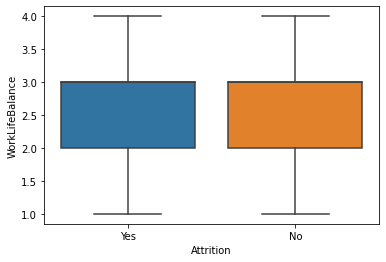

In [59]:
sns.boxplot(x = dfc["Attrition"], y = df["WorkLifeBalance"])

In [ ]:
# Gender and Attrition

Text(0.5, 1.0, 'Frequency of Gender across Employee Attrition')

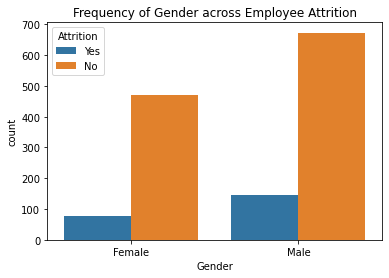

In [63]:
sns.countplot(data = dfc, x = "Gender", hue = "Attrition")

plt.title("Frequency of Gender across Employee Attrition")

In [ ]:
# job satisfaction and attition

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

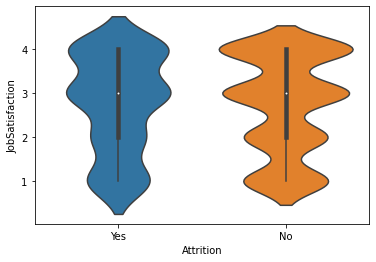

In [58]:
sns.violinplot(x = dfc["Attrition"], y = df["JobSatisfaction"])